# Keras

## Summary

- Introduction
- The Sequential model
- Layers API

## Introduction

### Keras in a nutshell

Keras is a high-level, user-friendly API for creating and training neural nets.

[![Keras logo](images/keras_logo.png)](https://keras.io)

### Keras and TensorFlow

- [TensorFlow](https://www.tensorflow.org/) is a platform for Machine Learning and Deep Learning created by Google.
- Originally, Keras could be used with many ML librairies as back-end for computations: TensorFlow 1.x, Theano, CNTK...
- Since TF 2.0, _tf.keras_ is the official high-level API of TensorFlow.
- The [2.3.0 release](https://github.com/keras-team/keras/releases/tag/2.3.0) (Sept. 2019) was the last major release of multi-backend Keras.
- "There is now only one Keras: *tf.keras*".

[TF 2.0 + Keras overview notebook](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO)

## The Sequential model

### Description

A *Sequential* model creates a linear stack of layers where each layer has exactly one input tensor and one output tensor.

Upon adding a new layer to the stack, Keras can automatically infer its input shape from the output shape of the previous layer.

It is the easiest way to create simple neural networks architectures with Keras.

### Example: creating a fully connected neural network

A *fully connected* or *dense* neural network is an architecture where all the nodes (neurons) in one layer are connected to the neurons in the next layer.

#### Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.8.3


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import make_blobs

scikit-learn version: 0.23.1


In [4]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

TensorFlow version: 2.3.1
Keras version: 2.4.0


In [5]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy
    Takes a Keras History object as parameter"""

    loss = history.history["loss"]
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, ".--", label="Training loss")
    final_loss = loss[-1]
    title = "Training loss: {:.4f}".format(final_loss)
    plt.ylabel("Loss")
    if "val_loss" in history.history:
        val_loss = history.history["val_loss"]
        plt.plot(epochs, val_loss, "o-", label="Validation loss")
        final_val_loss = val_loss[-1]
        title += ", Validation loss: {:.4f}".format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history["accuracy"]

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, ".--", label="Training acc")
    final_acc = acc[-1]
    title = "Training accuracy: {:.2f}%".format(final_acc * 100)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    if "val_accuracy" in history.history:
        val_acc = history.history["val_accuracy"]
        plt.plot(epochs, val_acc, "o-", label="Validation acc")
        final_val_acc = val_acc[-1]
        title += ", Validation accuracy: {:.2f}%".format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

#### Data generation

In [6]:
# Generate some data for training
# Each sample has 3 features and belongs to one of 2 classes
x_train, y_train = make_blobs(
    n_samples=1000, n_features=3, centers=2, cluster_std=2.0, random_state=11
)

#### Expected network architecture

![A simple neural network](images/neural_net2.jpeg)

#### Model creation

In [7]:
# Create a new sequential model
seq_model = Sequential()

# Add a 4-neurons layer using tanh as activation function
# Input shape corresponds the number of input features (here 3)
seq_model.add(Dense(4, activation='tanh', input_shape=(3,)))

# Add a 4-neurons layer using tanh
# Input shape is infered from previous layer
seq_model.add(Dense(4, activation='tanh'))

# Add a 1-neuron output layer using sigmoid
seq_model.add(Dense(1, activation='sigmoid'))

In [8]:
# Print a summary of model architecture
# (Can you justify the parameter counts for each layer?)
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

In [9]:
# Configuration of the training process
#   optimizer: gradient descent optimization method
#   loss: loss function
#   metrics: list of metrics monitored during training and testing
seq_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Model training

In [10]:
# Launch the training of the model on the data
#   epochs: number of epochs to train the model
#     An epoch is an iteration over the entire training dataset
#   batch_size: number of samples used for each gradient descent step
#     number of GD steps in an epoch = x_train.size / batch_size (rounded up)
#     total number of GD steps = epoch_GD_steps * epochs
#   verbose: level of information outputted during training
#     0 = silent, 1 = progress bar, 2 = one line per epoch
# The returned history object contains a record of loss and metrics values
history = seq_model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7260
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8910
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.9210
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.9450
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9580
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9690
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.9750
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9820
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.9860
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9890


#### Model evaluation

In [11]:
# Compute the loss & metrics values for the trained network
loss, acc = seq_model.evaluate(x_train, y_train, verbose=0)

print(f"Training loss: {loss:.05f}")
print(f"Training accuracy: {acc:.05f}")

Training loss: 0.08260
Training accuracy: 0.99000


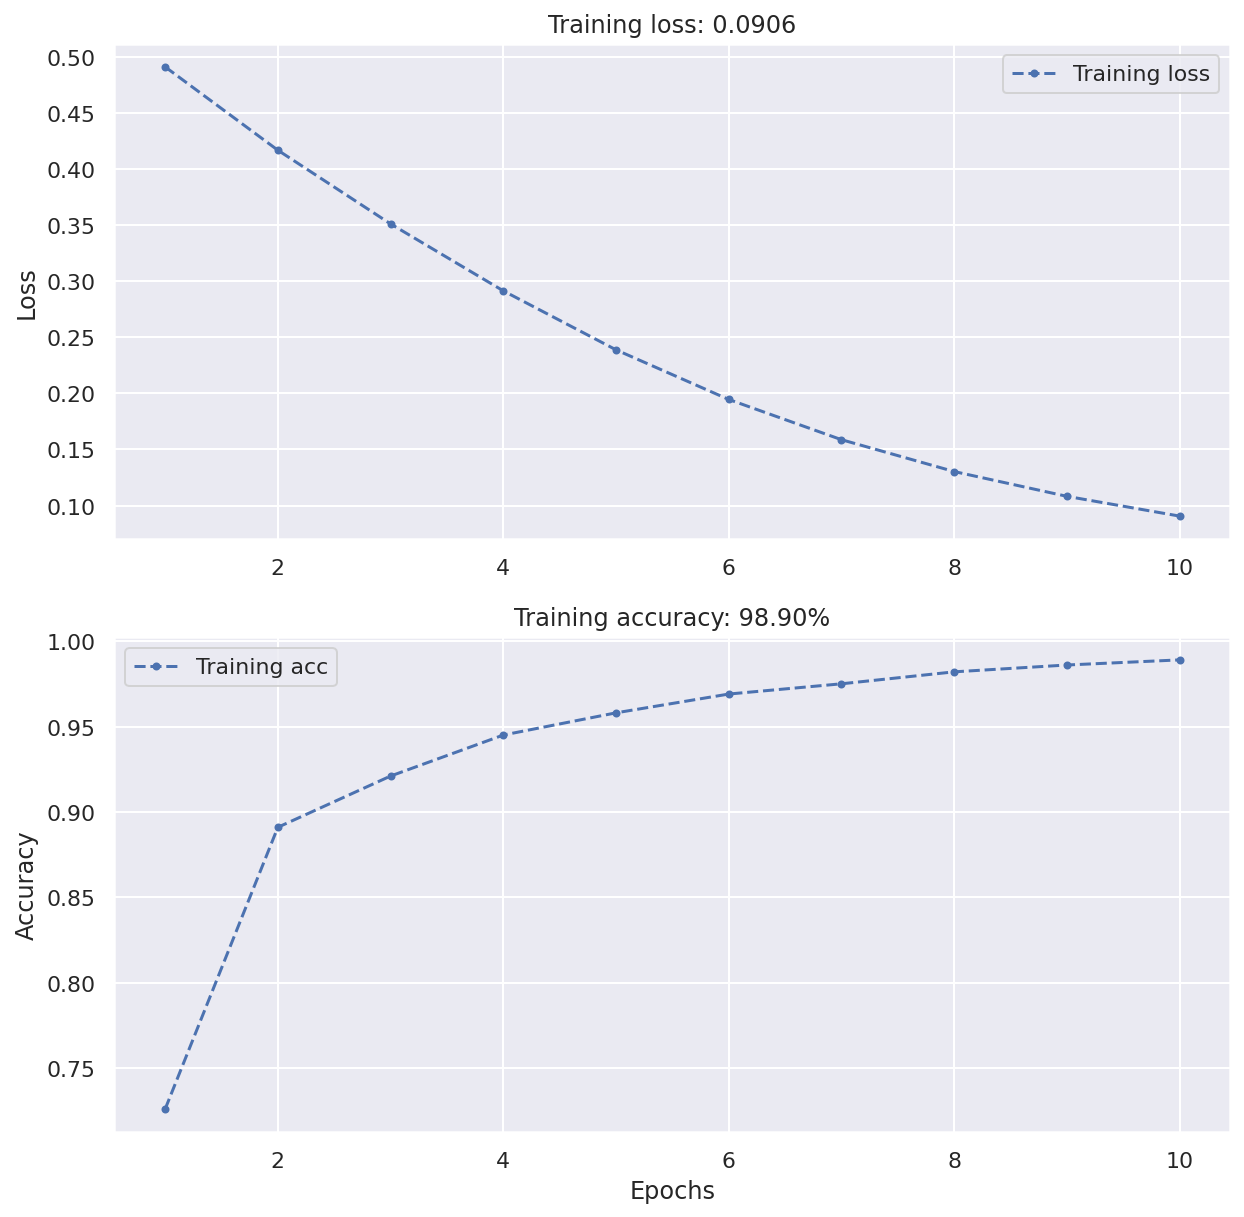

In [12]:
# Plot training metrics
plot_loss_acc(history)

## Layers API

### What is a layer?

Layers are the basic building blocks of neural networks in Keras.

A layer is a simple input-output transformation. It encapsulates a state (weights) and some computation.

Keras offers many layers for various purposes (convolution, pooling, reshaping...). See the [official documentation](https://keras.io/api/layers/) for details.

### Dense layer

Defines a fully-connected layer. Implements a weighted sum of its inputs plus a bias.

- Input shape: *(batch_size, input_dim)*
- Output shape: *(batch_size, units)*

In [13]:
# units: number of neurons in the layer
# activation: activation function
dense_layer = Dense(units=3, activation='relu')

### Flatten layer

Flattens its input without affecting the batch size. Often used before a *Dense* layer.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, product of input dimensions)*

In [14]:
flatten_layer = Flatten()

# Create a 4D tensor
input = np.random.rand(32, 3, 3, 64).astype(np.float32)
output = flatten_layer(input)
# 576 = 3*3*64
print(f"Output: {output.shape}")

Output: (32, 576)


### Dropout layer

Applies Dropout to the input, randomly setting input units to 0 with a frequency of *rate* at each step during training time, which helps prevent overfitting.

Output shape is not modified.

- Input shape: *(batch_size, input_dim1, input_dim2, ...)*
- Output shape: *(batch_size, input_dim1, input_dim2, ...)*

In [15]:
# rate: percentage of input units randomly set to 0 during training
dropout_layer = Dropout(rate=.2)

### Conv2D layer

Creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs, implementing spatial convolution over images.

- Input shape: *(batch_size, rows, cols, channels)*
- Output shape: *(batch_size, new_rows, new_cols, filters)*

In [16]:
# filters: number of output filters in the convolution
# kernel_size: height and width of the 2D convolution window
# activation: activation function
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
conv2d_layer = Conv2D(
    filters=64, kernel_size=(3, 3), activation="relu", padding="valid"
)

### MaxPooling2D layer

Implements the Max pooling operation for 2D spatial data.

- Input shape: *(batch_size, rows, cols, channels)*
- Ouput shape: *(batch_size, pooled_rows, pooled_cols, channels)*

In [17]:
# pool_size: window size over which to take the maximum
# padding: padding of the input such that output has the same height/width dimension
#   "valid": no padding, "same": padding enabled
maxpool2d_layer = MaxPooling2D(pool_size=(2, 2), padding="valid")